### Problem-1:  
A review of the Big-O notation ([ja](https://ja.wikipedia.org/wiki/%E3%83%A9%E3%83%B3%E3%83%80%E3%82%A6%E3%81%AE%E8%A8%98%E5%8F%B7), [en](https://en.wikipedia.org/wiki/Big_O_notation)).  
Consider two sequences
of non-stochastic real numbers ${a_n}$ and ${b_n}$ with $n \in N$ . Assume that $a_n = O(n^k)$ and
$b_n = O(n^l)$ for some $k, l \in  R$.

__(a) Prove that__ : $ \mathbf{a_n + b_n = O(n^{max\{k,l\}})}$  

In the Big-O notation, when f(x) is a sum of several terms, the one with the leargest growth rate is kept and all the others are omitted.   
That is, $O(f_1(n)) + O(f_2(n)) = $
Since this function is a sum of $a_n$ and $b_n$, only the learger one is taken and the other is omitted. 

Therefore, $a_n + b_n = O(n^{max\{k,l\}}) $

**(b) Prove that:** $\mathbf{a_nb_n =O(n^{k+l})}$  

In the Big-O notation, the big o of the product of the functions can be multiplied. That is, $f_1(n)\:f_2(n) = O(g_1(n)\:g_2(n))$, where $f(n) =O(g(n))$ as $x \rightarrow \infty$  
Therefore, $a_n  b_n = O(n^{k+l})$

**(c) Prove that:** $ \mathbf{a_n^l =O(n^{kl})} $**, whenever** $\mathbf{a_n^l}$ **is well defined**    

Since $a_n^l$ is a product of $a_n$ multiplying $l$ times, similary to (b),  

$a_n^l = O(n^{kl})$

### Problem-2
A review of the Big-Op notation ([Big-O in probablity notation](https://en.wikipedia.org/wiki/Big_O_in_probability_notation)).  
Consider two sequences of real. stochastic numbers $\{x_n\}$ and $\{y_n\}$ with $n \in N$. Assume that $x_n =O_p(n^k)$ and $y_n = O_p(n^l)$ for some $k, l, \in R$

__(a) Prove that: __ $\mathbf{x_n + y_n =O_p(n^{max\{k,l\}})} $ 

**(b) Prove that: ** $\mathbf{x_ny_n = O_p(n^{kl})}$ 

**(c) Prove that:** $ \mathbf{a_n^l =O_p(n^{kl})} $**, whenever** $\mathbf{a_n^l}$ **is well defined**    

### Problem-4


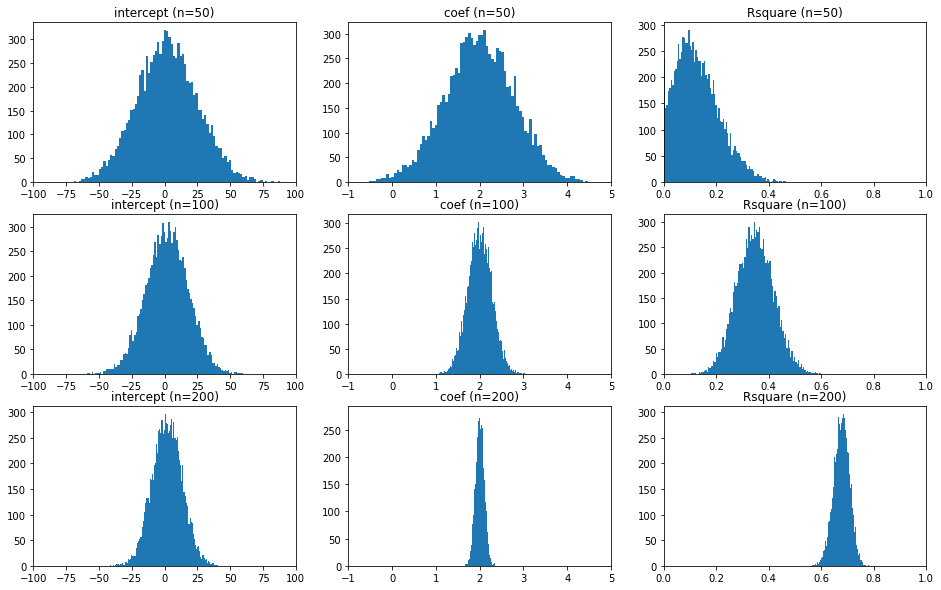

In [66]:
# import libraries 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
% matplotlib inline 

# generate epsilon, run OLS
epsilon=np.random.normal(0,80,50).reshape(50,-1)
t= np.arange(1,51).reshape(50,-1)
y=2+2*t+epsilon
ols= LinearRegression()
ols.fit(t,y)

# monte carlo sim with n=50 and J=10000
intercept_50=[]
coef_50=[]
Rsquared_50=[]
for i in np.arange(10000):
    epsilon=np.random.normal(0,80,50).reshape(50,-1)
    t= np.arange(1,51).reshape(50,-1)
    y=2+2*t+epsilon
    ols= LinearRegression()
    ols.fit(t,y)
    intercept_50.append(ols.intercept_[0])   # [0] because the intercept is returned in list form
    coef_50.append(ols.coef_.tolist()[0][0]) # [0][0] because coef is in tupple
    Rsquared_50.append(ols.score(t,y))
    
# MCsim: n=100
intercept_100=[]
coef_100=[]
Rsquared_100=[]
for i in np.arange(10000):
    epsilon=np.random.normal(0,80,100).reshape(100,-1)
    t= np.arange(1,101).reshape(100,-1)
    y=2+2*t+epsilon
    ols= LinearRegression()
    ols.fit(t,y)
    intercept_100.append(ols.intercept_[0])
    coef_100.append(ols.coef_.tolist()[0][0])
    Rsquared_100.append(ols.score(t,y))

# MC sim: n=200
intercept_200=[]
coef_200=[]
Rsquared_200=[]
for i in np.arange(10000):
    epsilon=np.random.normal(0,80,200).reshape(200,-1)
    t= np.arange(1,201).reshape(200,-1)
    y=2+2*t+epsilon
    ols= LinearRegression()
    ols.fit(t,y)
    intercept_200.append(ols.intercept_[0])
    coef_200.append(ols.coef_.tolist()[0][0])
    Rsquared_200.append(ols.score(t,y))
    
    
# Visualise    
# n=50
plt.figure(1, figsize=(16,10))
plt.subplot(331)
plt.hist(intercept_50, bins=100)
plt.title('intercept (n=50)')
plt.xlim(-100,100)

plt.subplot(332)
plt.hist(coef_50,bins=100)
plt.title('coef (n=50)')
plt.xlim(-1,5)

plt.subplot(333)
plt.hist(Rsquared_50,bins=100)
plt.title('Rsquare (n=50)')
plt.xlim(0,1)


# n=100
plt.subplot(334)
plt.hist(intercept_100, bins=100)
plt.title('intercept (n=100)')
plt.xlim(-100,100)

plt.subplot(335)
plt.hist(coef_100,bins=100)
plt.title('coef (n=100)')
plt.xlim(-1,5)

plt.subplot(336)
plt.hist(Rsquared_100,bins=100)
plt.title('Rsquare (n=100)')
plt.xlim(0,1)


# n=200
plt.subplot(337)
plt.hist(intercept_200, bins=100)
plt.title('intercept (n=200)')
plt.xlim(-100,100)


plt.subplot(338)
plt.hist(coef_200,bins=100)
plt.title('coef (n=200)')
plt.xlim(-1,5)

plt.subplot(339)
plt.hist(Rsquared_200,bins=100)
plt.xlim(0,1)
plt.title('Rsquare (n=200)')
plt.show()

In [70]:
# Bias
print('Bias')
print('alpha(n=50) : %.4f' %np.average([x-2 for x in intercept_50]))
print('alpha(n=100): %.4f' %np.average([x-2 for x in intercept_100]))
print('alpha(n=200): %.4f' %np.average([x -2 for x in intercept_200]))
print('delta(n=50): %.5f' % np.average([x-2 for x in coef_50]))
print('delta(n=100): %.5f' % np.average([x-2 for x in coef_100]))
print('delta(n=200): %.5f' % np.average([x-2 for x in coef_200]))
print('\n')

# Variance
print('Variance')
print('alpha(n=50) : %.4f' %np.var([intercept_50]))
print('alpha(n=100): %.4f' %np.var([intercept_100]))
print('alpha(n=200): %.4f' %np.var([intercept_200]))
print('delta(n=50): %.5f' % np.var([coef_50]))
print('delta(n=100): %.6f' % np.var([coef_100]))
print('delta(n=200): %.6f' % np.var([coef_200]))
print('\n')

# MSE
print('MSE')
print('alpha(n=50) : %.4f' %np.average([(x-2)**2 for x in intercept_50]))
print('alpha(n=100): %.4f' %np.average([(x-2)**2 for x in intercept_100]))
print('alpha(n=200): %.4f' %np.average([(x-2)**2 for x in intercept_200]))
print('delta(n=50): %.5f' % np.average([(x-2)**2 for x in coef_50]))
print('delta(n=100): %.6f' % np.average([(x-2)**2 for x in coef_100]))
print('delta(n=200): %.6f' % np.average([(x-2)**2 for x in coef_200]))

Bias
alpha(n=50) : 0.0870
alpha(n=100): -0.0305
alpha(n=200): -0.0943
delta(n=50): -0.00508
delta(n=100): 0.00084
delta(n=200): 0.00125


Variance
alpha(n=50) : 534.6763
alpha(n=100): 263.6311
alpha(n=200): 131.9409
delta(n=50): 0.62932
delta(n=100): 0.076489
delta(n=200): 0.009826


MSE
alpha(n=50) : 534.6839
alpha(n=100): 263.6320
alpha(n=200): 131.9498
delta(n=50): 0.62935
delta(n=100): 0.076490
delta(n=200): 0.009827
